# Goal of the project

The goal of this project is to build a logistic regression model to predict real estate prices in France.

# Useful Links

Link for the repository on GitHub:

https://github.com/tlemenestrel/Classifying_Companies_Bankruptcy_Risks

Link for the Companies.csv file:

https://raw.githubusercontent.com/tlemenestrel/Classifying_Companies_Bankruptcy_Risks/master/Data/bankruptcy_data.csv

Tutorial on logistic regression:

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# Data Dictionnary for the dataset

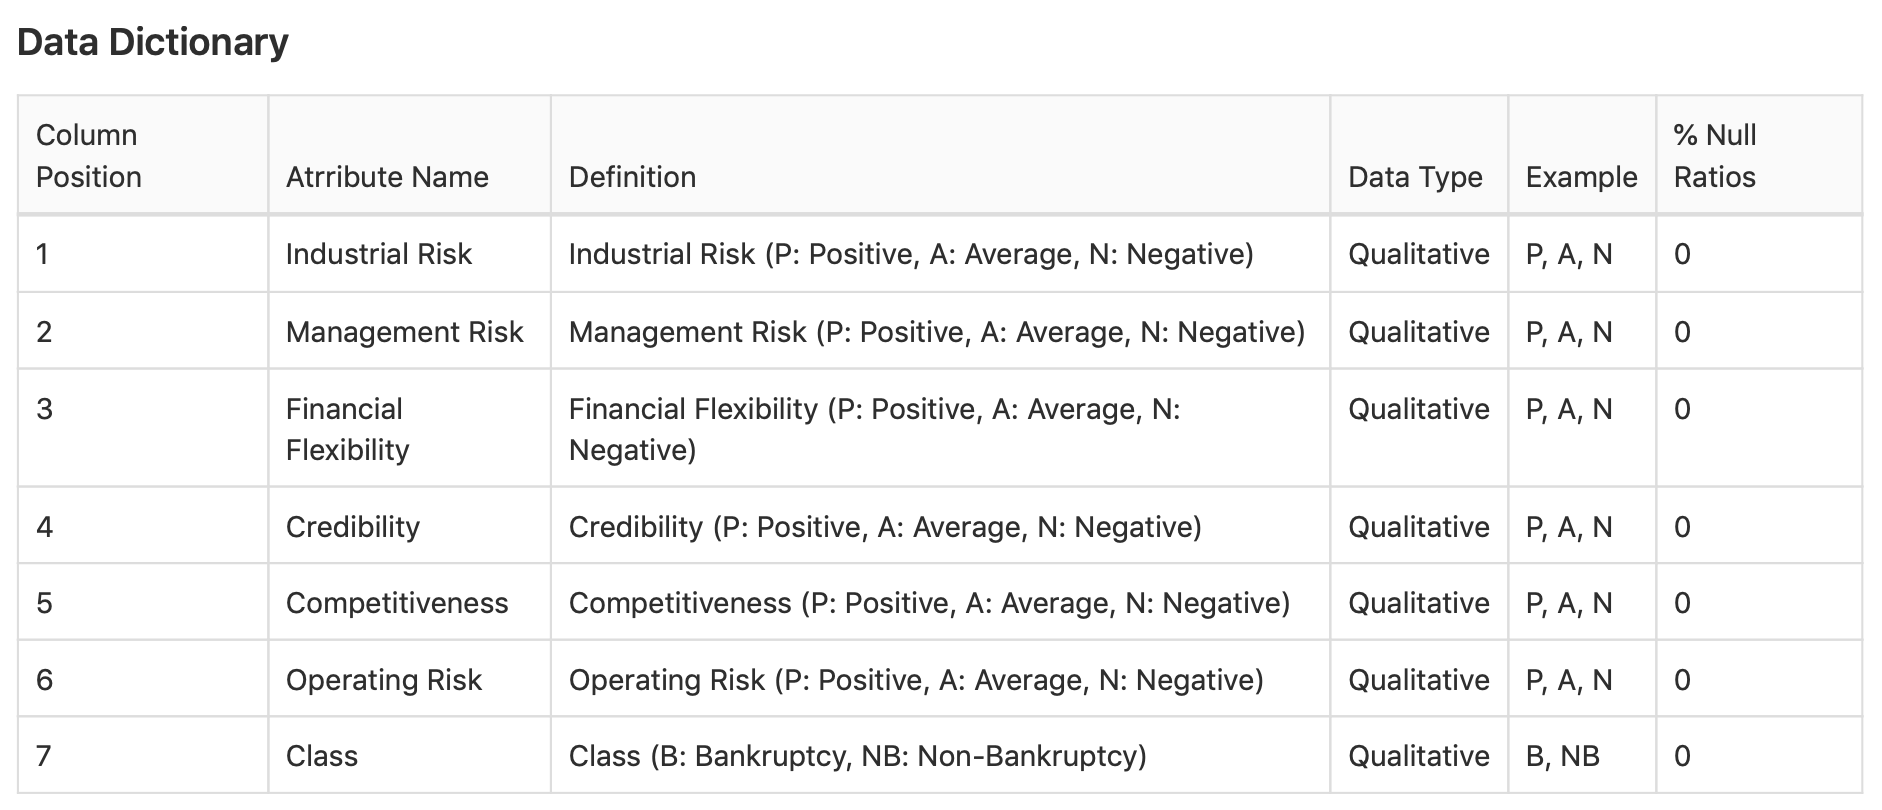

In [135]:
from IPython.display import Image
Image("Images/Data_dictionnary.png")

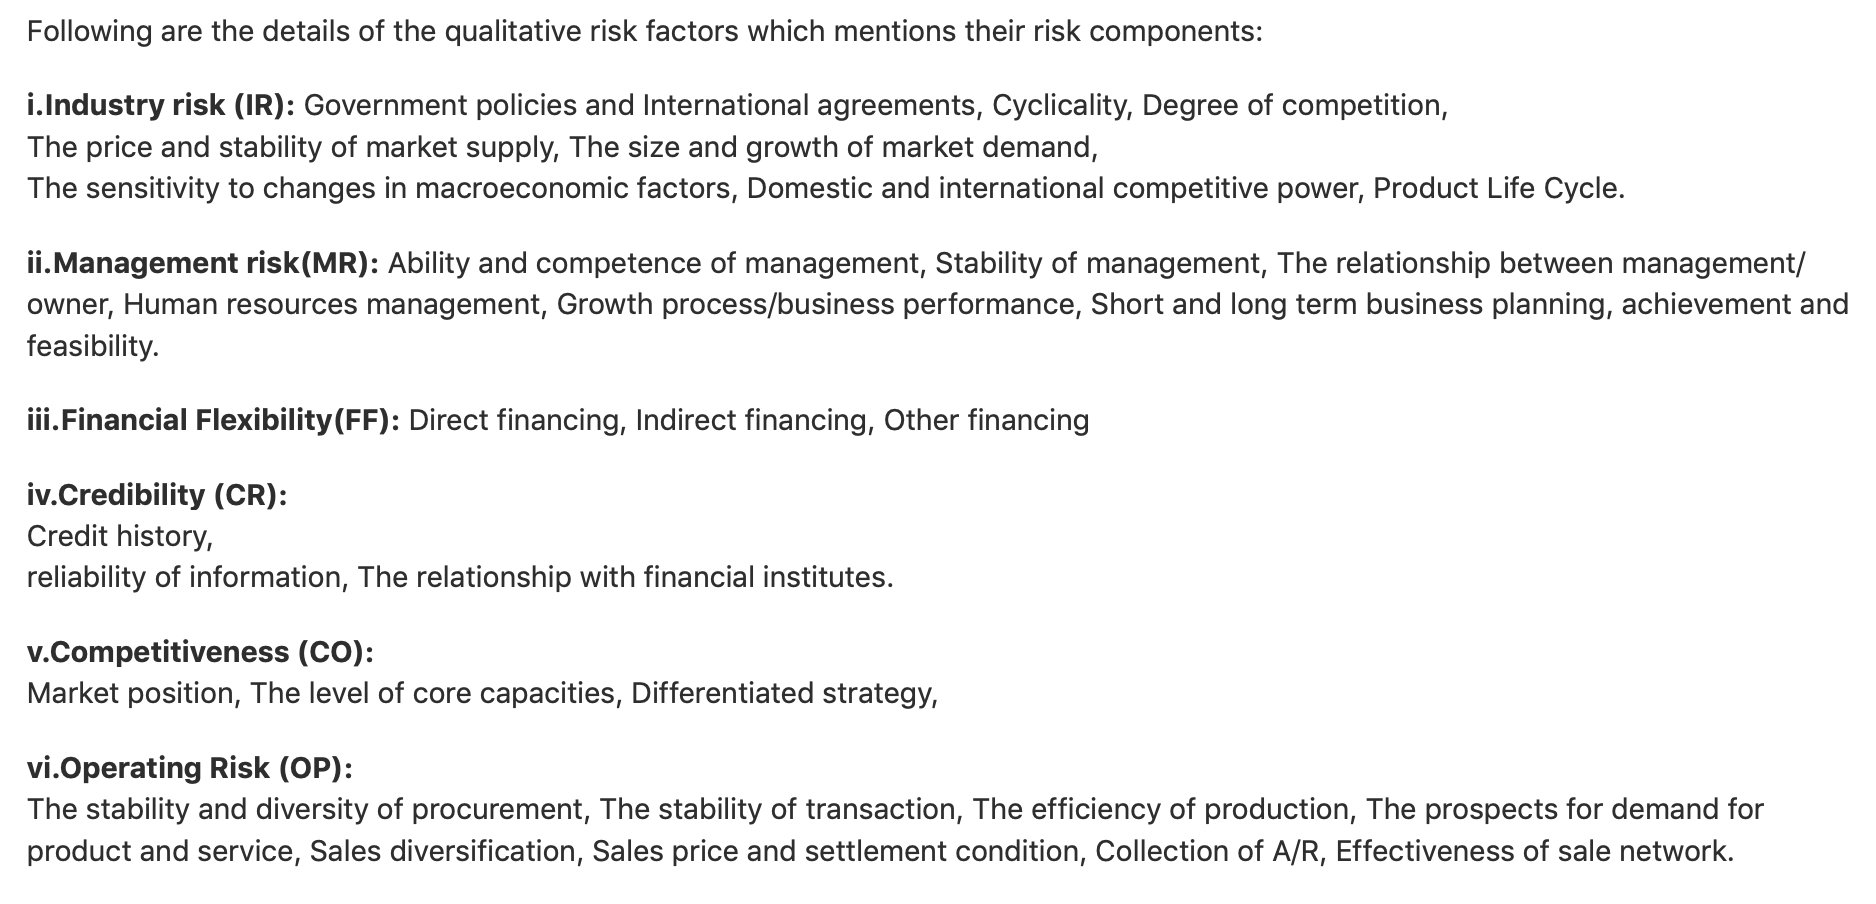

In [136]:
Image("Images/Data_dictionnary_2.png")

# Companies Bankruptcy Risk Prediction Model

### Import the necessary modules

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Model

from sklearn.linear_model import LogisticRegression

# Statistics

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Train-test-split

from sklearn.model_selection import train_test_split

# Random and Grid Search for hyperparameters tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Downloading the Companies .csv file from GitHub

In [138]:
url_companies = "https://raw.githubusercontent.com/tlemenestrel/Classifying_Companies_Bankruptcy_Risks/master/Data/bankruptcy_data.csv"

# Reading the downloaded content and making it a pandas dataframe

df = pd.read_csv(url_companies)

# Printing out the first 5 rows of the dataframe

print (df.head())
print (df.shape)

  Industrial Risk Management Risk Financial Flexibility Credibility  \
0               P               P                     A           A   
1               N               N                     A           A   
2               A               A                     A           A   
3               P               P                     P           P   
4               N               N                     P           P   

  Competitiveness Operating Risk Class  
0               A              P    NB  
1               A              N    NB  
2               A              A    NB  
3               P              P    NB  
4               P              N    NB  
(250, 7)


# Data Cleaning

### Checking for null values

In [139]:
df.isnull()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False


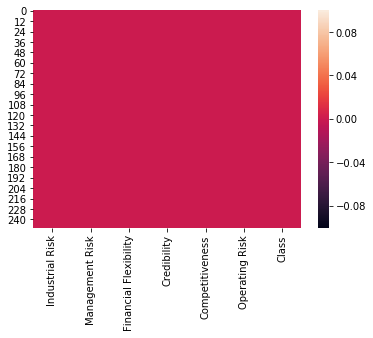

In [140]:
sns.heatmap(df.isnull())

# Data preparation

In this part of the notebook, we are going to perform initial investigations on the data to discover patterns, spot anomalies, test hypotheses and  check assumptions with the help of summary statistics and graphical representations.

### Adding underscores for the variables

In [141]:
df.columns = df.columns.str.replace(' ', '_')

print(df.head)

<bound method NDFrame.head of     Industrial_Risk Management_Risk Financial_Flexibility Credibility  \
0                 P               P                     A           A   
1                 N               N                     A           A   
2                 A               A                     A           A   
3                 P               P                     P           P   
4                 N               N                     P           P   
..              ...             ...                   ...         ...   
245               N               N                     A           N   
246               P               N                     N           N   
247               A               N                     N           N   
248               N               N                     N           N   
249               P               N                     N           N   

    Competitiveness Operating_Risk Class  
0                 A              P    NB  
1      

### Function to print out the data type of each column

In [142]:
def print_data_type_of_dataframe_columns(df):
    
    dataTypeSeries = df.dtypes
 
    print('Data type of each column of Dataframe :')
    print(dataTypeSeries)

### Printing out the data type of each columns of the dataframe

In [143]:
print_data_type_of_dataframe_columns(df)

Data type of each column of Dataframe :
Industrial_Risk          object
Management_Risk          object
Financial_Flexibility    object
Credibility              object
Competitiveness          object
Operating_Risk           object
Class                    object
dtype: object


# Exploratory Data Analysis (EDA)

In this part of the notebook, we are going to perform initial investigations on the data to discover patterns, spot anomalies, test hypotheses and  check assumptions with the help of summary statistics and graphical representations.

# How important is the region in the price?

The dataset contained 3 different values for the Industrial Risk column: P (Positive), A (Average) and N (Negative)

### Plotting the Industrial Risk of companies

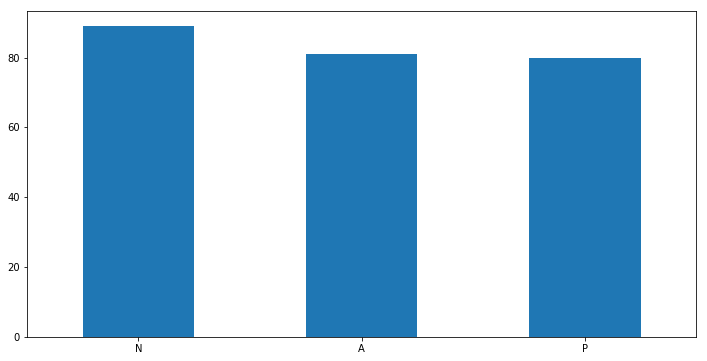

In [144]:
industrial_risk_dataframe = df['Industrial_Risk'].value_counts()
plot_industrial_risk = industrial_risk_dataframe.plot.bar(x = 'Industrial Risk', y = 'Count', rot =0,figsize = (12,6))

# Data Preparation

## Encoding

## Ordinal Encoding

In [145]:
# create dictionary of ordinal to integer mapping

ordinal_dictionnary = { 'N':1, 'A':2, 'P':3 }

# apply using map

df['Industrial_Risk'] = df['Industrial_Risk'].map(ordinal_dictionnary)
df['Management_Risk'] = df['Management_Risk'].map(ordinal_dictionnary)
df['Financial_Flexibility'] = df['Financial_Flexibility'].map(ordinal_dictionnary)
df['Credibility'] = df['Credibility'].map(ordinal_dictionnary)
df['Competitiveness'] = df['Competitiveness'].map(ordinal_dictionnary)
df['Operating_Risk'] = df['Operating_Risk'].map(ordinal_dictionnary)

print (df.head)

<bound method NDFrame.head of      Industrial_Risk  Management_Risk  Financial_Flexibility  Credibility  \
0                  3                3                      2            2   
1                  1                1                      2            2   
2                  2                2                      2            2   
3                  3                3                      3            3   
4                  1                1                      3            3   
..               ...              ...                    ...          ...   
245                1                1                      2            1   
246                3                1                      1            1   
247                2                1                      1            1   
248                1                1                      1            1   
249                3                1                      1            1   

     Competitiveness  Operating_Risk Class  


## Binary encoding

Here, we will encode the target variable, B (Bankruptcy) as 1 and NB (Not-Bankruptcy) as 0.

In [146]:
df['Class'] = df['Class'].replace({'B':1, 'NB':0})

print (df.head)

<bound method NDFrame.head of      Industrial_Risk  Management_Risk  Financial_Flexibility  Credibility  \
0                  3                3                      2            2   
1                  1                1                      2            2   
2                  2                2                      2            2   
3                  3                3                      3            3   
4                  1                1                      3            3   
..               ...              ...                    ...          ...   
245                1                1                      2            1   
246                3                1                      1            1   
247                2                1                      1            1   
248                1                1                      1            1   
249                3                1                      1            1   

     Competitiveness  Operating_Risk  Class  

# Features Selection

### Pearson Correlation Matrix

In [147]:
def build_pearson_correlation_matrix_of_dataframe(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.savefig('Images/pearson_correlation_matrix.png', bbox_inches='tight')
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

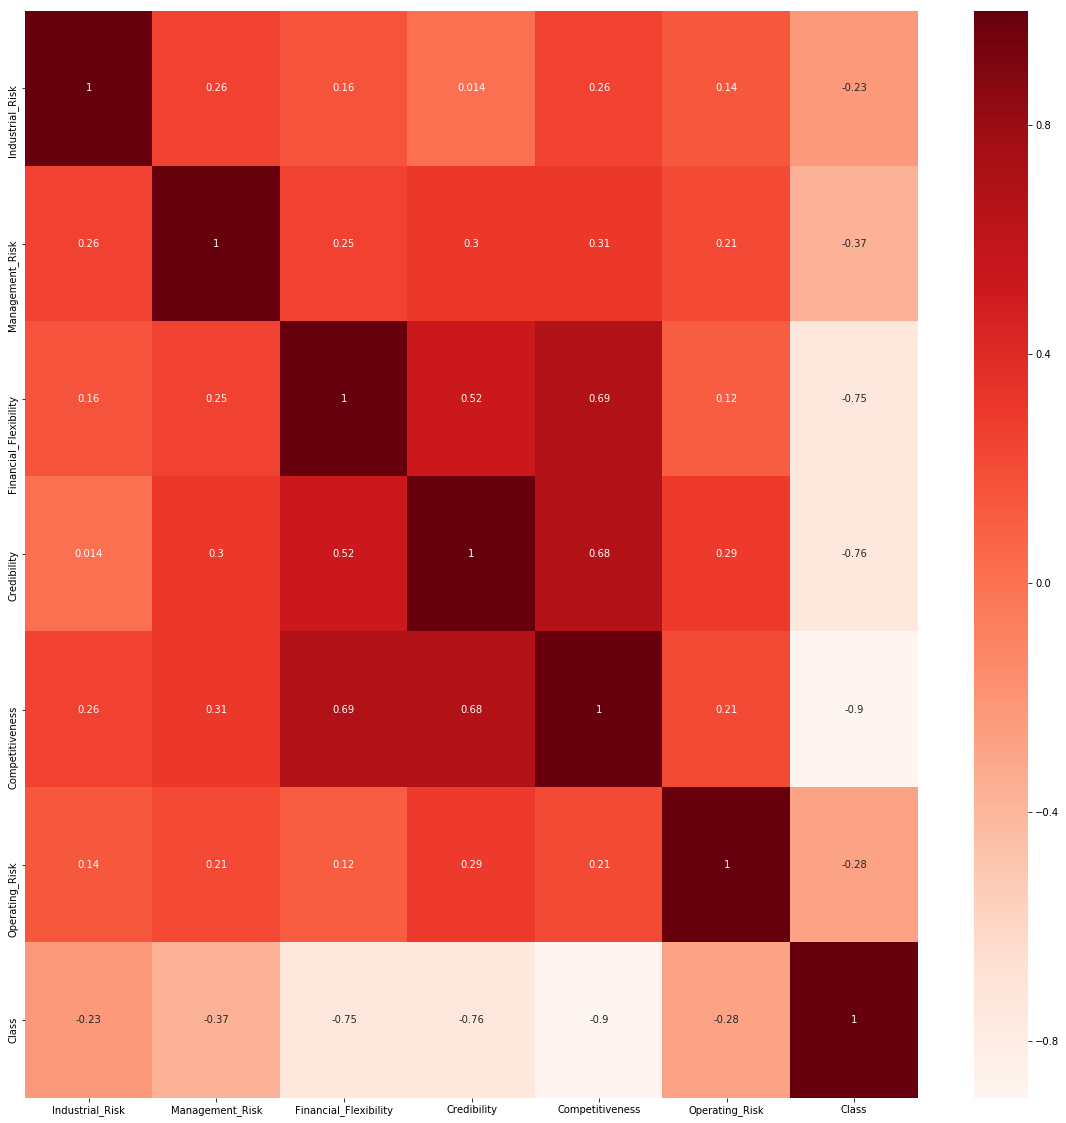

Financial_Flexibility    0.751020
Credibility              0.755909
Competitiveness          0.899452
Class                    1.000000
Name: Class, dtype: float64


In [148]:
build_pearson_correlation_matrix_of_dataframe(20,20,df,"Class",0.5)

Based on the Pearson correlation's matrix, we see that  Financial Flexibility, Credibility and Competitiveness have the highest correlation with the target variable.

# Logistic Regression

In [149]:
y = df[['Class']]

# Dropping 

X = df.drop(['Class'], axis = 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Instantiate the Logistic Regression model

In [150]:
logistic_regression = LogisticRegression()

### Fitting the Logistic Regression model

In [151]:
logistic_regression.fit(X_train, y_train);

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Predicting using the model

In [152]:
y_pred = logistic_regression.predict(X_test)

### Printing out the prediction of the model

In [153]:
logistic_regression.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1])

# Results of the model

Here, we will evaluate the accuracy of the accuracy using statistics.

### Defining a function to print out the results of a model

In [154]:
def printing_out_results_of_a_model(model,X_test,y_test):

    # Use the model on the testing data to predict the results

    y_pred = model.predict(X_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))

### Printing out the results of the Logistic Regression model

In [155]:
printing_out_results_of_a_model(logistic_regression,X_test,y_test)

R2 score:

91.95 %


Mean-squared error:

0.02


### ROC Curve

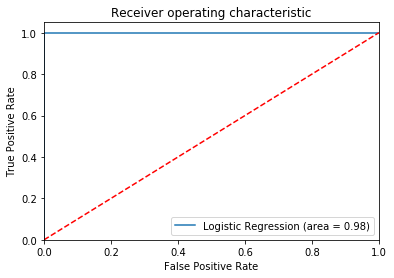

In [156]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Classification report

In [157]:
print(classification_report(y_test,logistic_regression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        27

   micro avg       0.98      0.98      0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



##  Confusion Matrix

### Computing the Confusion Matrix

In [158]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  0],
       [ 1, 26]])

### Plotting the Confusion Matrix Heatmap

Text(0.5, 257.44, 'Predicted label')

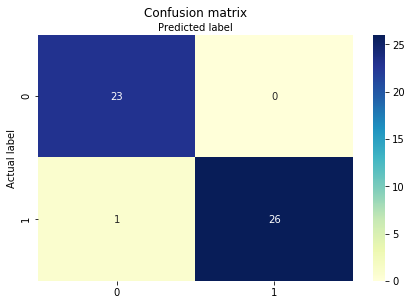

In [159]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Here, we see that our classifier only made one mistake, where it confused a 1 with a 0.

### Conclusion

The results of the model are quite good: it only made 1 mistake out of almost 50 samples when making a prediction on the test set.